## Part1

In [63]:
data = read.csv(file = 'ex1/ex1data1.txt', sep = ",", header = FALSE)

In [64]:
m = nrow(data);
sprintf("m = %s", m)

[1] "m = 97"

In [85]:
X = as.matrix(data[,1])
y = as.matrix(data[,2])

In [46]:
X = cbind(sample(1, m, replace = TRUE), X);
summary(X)

       V1          V2        
 Min.   :1   Min.   : 5.027  
 1st Qu.:1   1st Qu.: 5.708  
 Median :1   Median : 6.589  
 Mean   :1   Mean   : 8.160  
 3rd Qu.:1   3rd Qu.: 8.578  
 Max.   :1   Max.   :22.203  

In [47]:
theta = matrix(sample(0, size = 2, replace = TRUE));
theta

0
0


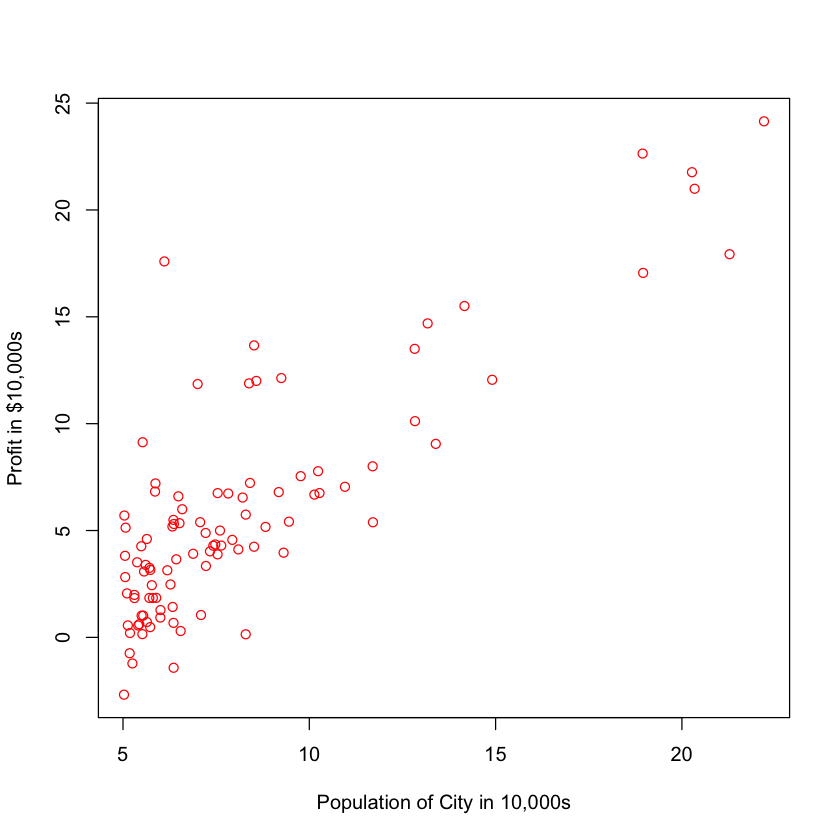

In [48]:
plot(X[,2], y, ylab = "Profit in $10,000s", xlab = "Population of City in 10,000s", col = "red")

In [50]:
computeCoast = function(X, y, theta){
    m = nrow(y)
    J = (1/(2*m)*sum((X%*%theta-y)^2))
    return(J)
}

In [51]:
computeCoast(X = X, y = y, theta = theta)

[1] 32.07273

In [52]:
computeCoast(X, y, c(-1, 2))

[1] 54.24246

In [53]:
gradientDescent = function(X, y, theta, alpha, interetions){
    m = nrow(y)
    J_history = matrix(sample(0, interetions, replace = TRUE), ncol = 1)
    for(i in c(1:interetions)){
        theta = theta - (alpha/m)*(t(X)%*%(X%*%theta-y))
        
        J_history[i] = computeCoast(X, y, theta)
    }
    
    return (list("theta" = theta, "J_history" = J_history))
}

In [54]:
alpha = 0.01
interations = 1500

In [55]:
result = gradientDescent(X, y, theta, alpha, interations)

In [56]:
result$theta

-3.630291
1.166362


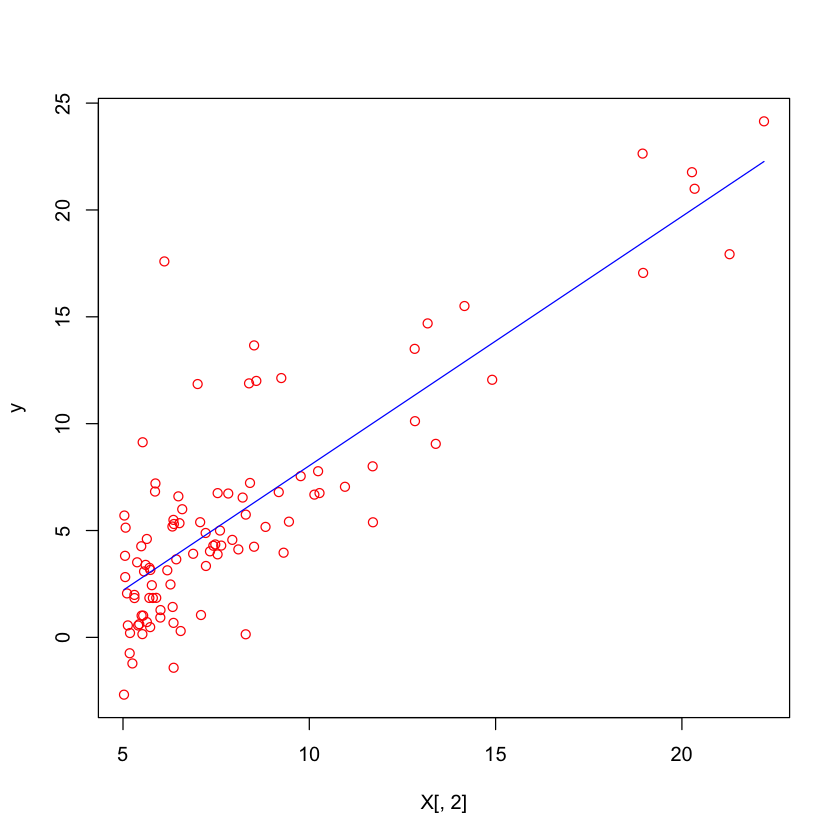

In [57]:
plot(X[,2], y, type = "p", col = "red")
lines(X[,2], X%*%result$theta, type = "l", col = "blue")

---

## Part2

In [118]:
data = read.csv(file = 'ex1/ex1data2.txt', sep = ",", header = FALSE)

In [119]:
X = as.matrix(data[,1:2])
y = as.matrix(data[,3])

In [120]:
featureNormalize = function(X) {
    mu = colMeans(X);
    sigma = apply(X, FUN = sd, MARGIN = ncol(X))
    difference = sweep(X, ncol(X), mu)
    result = apply(difference, 1, function(item) item/sigma)
    return(list("X"=t(result), "mu"=mu, "sigma"=sigma));
}

In [121]:
result = featureNormalize(X)

In [123]:
X = cbind(sample(1, size = nrow(y), replace = TRUE), result$X)

In [129]:
theta = matrix(sample(0, size = 3, replace = TRUE), 3, 1)
theta

0
0
0


In [134]:
alpha=0.1;
interations=50;

In [135]:
gradient = gradientDescent(X, y, theta, alpha, interations)

In [136]:
gradient$theta

,338658.2492
V1,104127.5156
V2,-172.2053


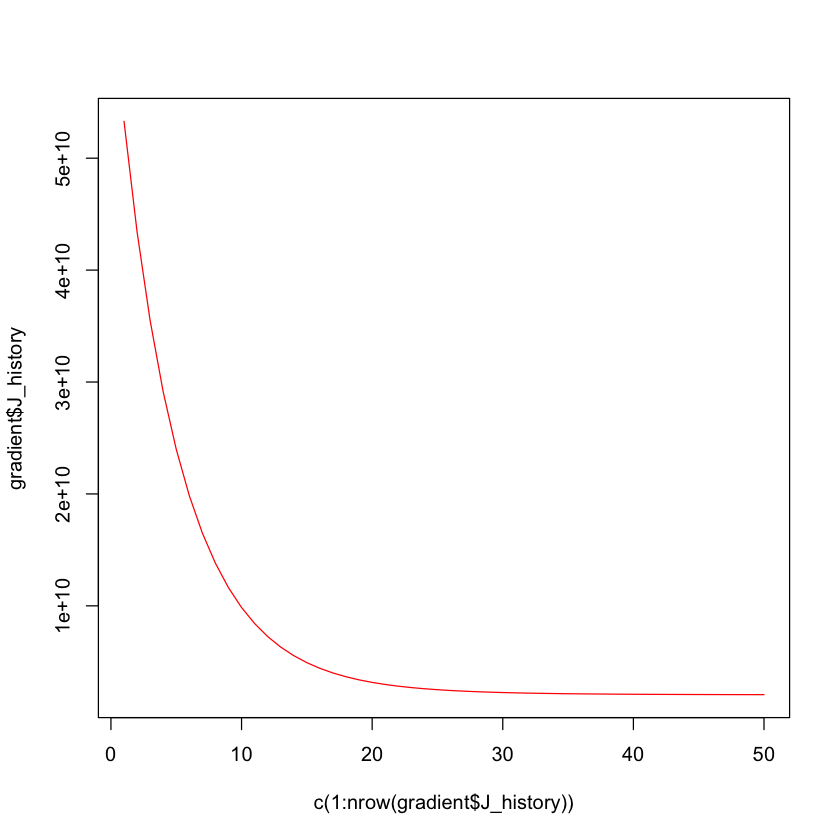

In [139]:
plot(c(1:nrow(gradient$J_history)), gradient$J_history, type = 'l', col='red')

In [142]:
new_data = matrix(c(1, 1650, 3))
new_data

1
1650
3


In [143]:
predict = t(new_data)%*%gradient$theta
predict

172148542


In [158]:
normalEqn = function(X,y)
{
    return (solve(t(X)%*%X)%*%(t(X)%*%y))
}

In [159]:
X = as.matrix(data[,1:2])
y = as.matrix(data[,3])
X = cbind(sample(1, size = nrow(y), replace = TRUE), X)

In [161]:
new_theta = normalEqn(X,y)
new_theta

,89597.9095
V1,139.2107
V2,-8738.0191


In [162]:
predict = t(new_data)%*%new_theta
predict

293081.5
